In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
X = df.iloc[: , 2:-1].values

y = df.iloc[: , -1].values

In [ ]:
print(X)

[['Wii' 2006.0 'Sports' ... 29.02 3.77 8.46]
 ['NES' 1985.0 'Platform' ... 3.58 6.81 0.77]
 ['Wii' 2008.0 'Racing' ... 12.88 3.79 3.31]
 ...
 ['PS2' 2008.0 'Racing' ... 0.0 0.0 0.0]
 ['DS' 2010.0 'Puzzle' ... 0.01 0.0 0.0]
 ['GBA' 2003.0 'Platform' ... 0.0 0.0 0.0]]


In [ ]:
print(y)

[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Filling missing values

In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Here we see two featuers have missing values - Year and publisher


We can check percentage of missing values:

In [ ]:
(df.isna().sum() * 100) / df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Year has 1.6% and publisher has 0.3% missing values.

In [ ]:
# null values are little so i will drop them
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0]) #Filling publisher values with mode as it is catgorical
df.dropna(inplace=True)
df['Year']=df['Year'].astype(int)

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
#duplication check
len(df)-len(df.drop_duplicates())

0

#EDA

<ipython-input-14-ea831e56785e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Year'],color='green')


<Axes: xlabel='Year', ylabel='Density'>

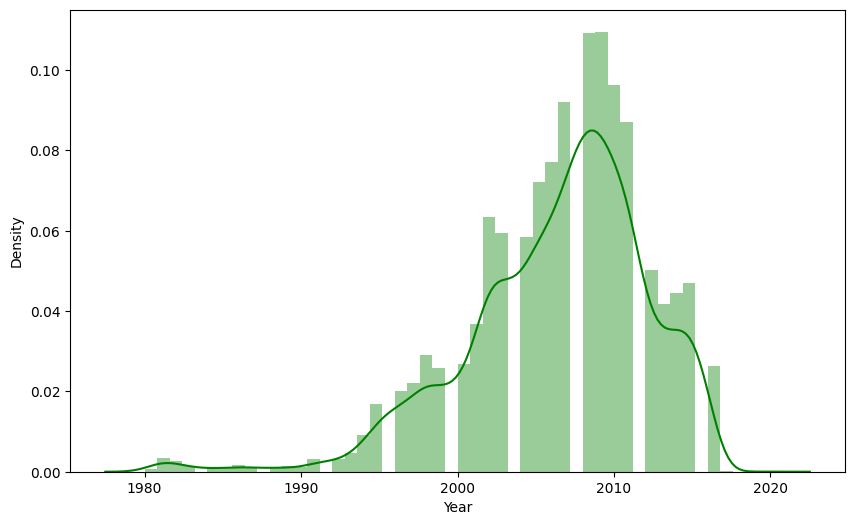

In [ ]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'],color='green')

We can see 2009 got the highest sales...

Text(0.5, 1.0, 'Sales of different genre in North America')

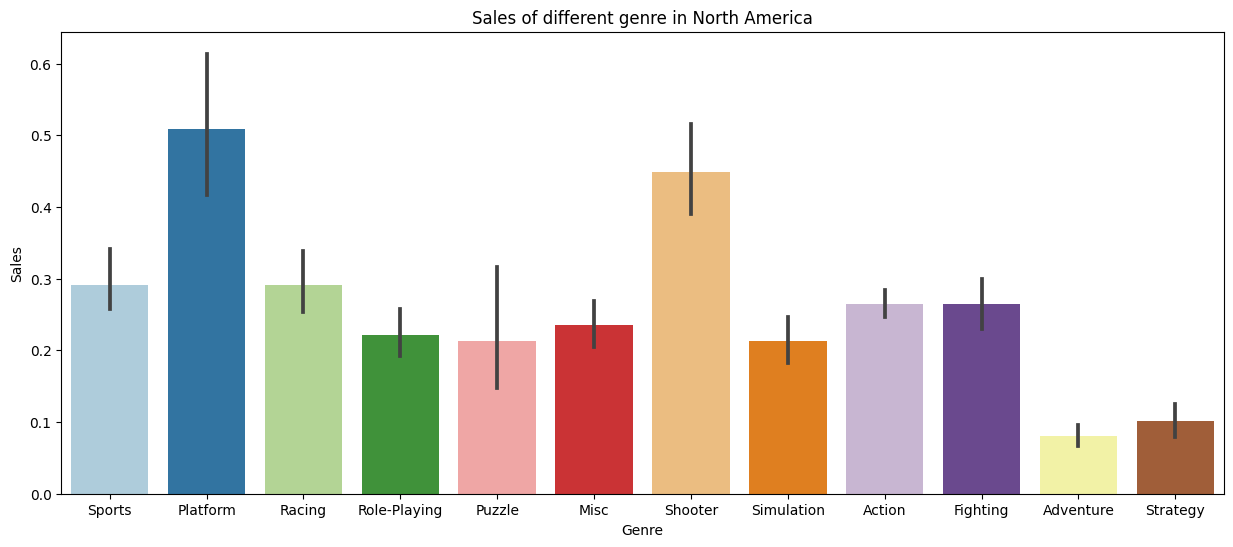

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in North America')

We see Platformer games have highest sales in NA, with Shooter a close 2nd.

Text(0.5, 1.0, 'Sales of different genre in Europe')

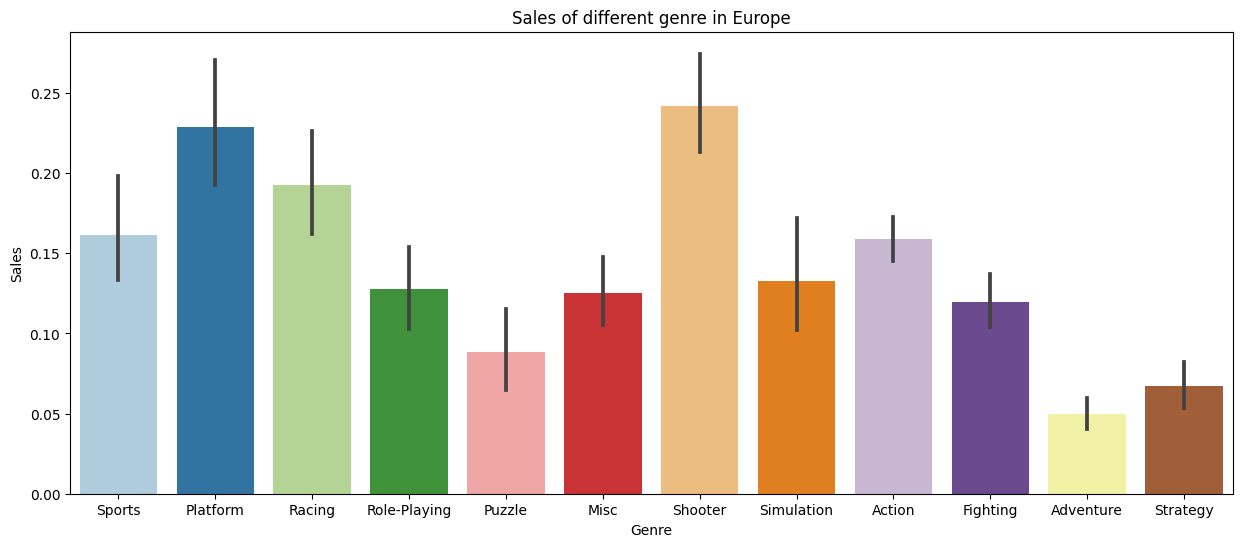

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='EU_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Europe')

Shooter have highest sales in EU and Platformers close at second highest.

Text(0.5, 1.0, 'Sales of different genre in Japan')

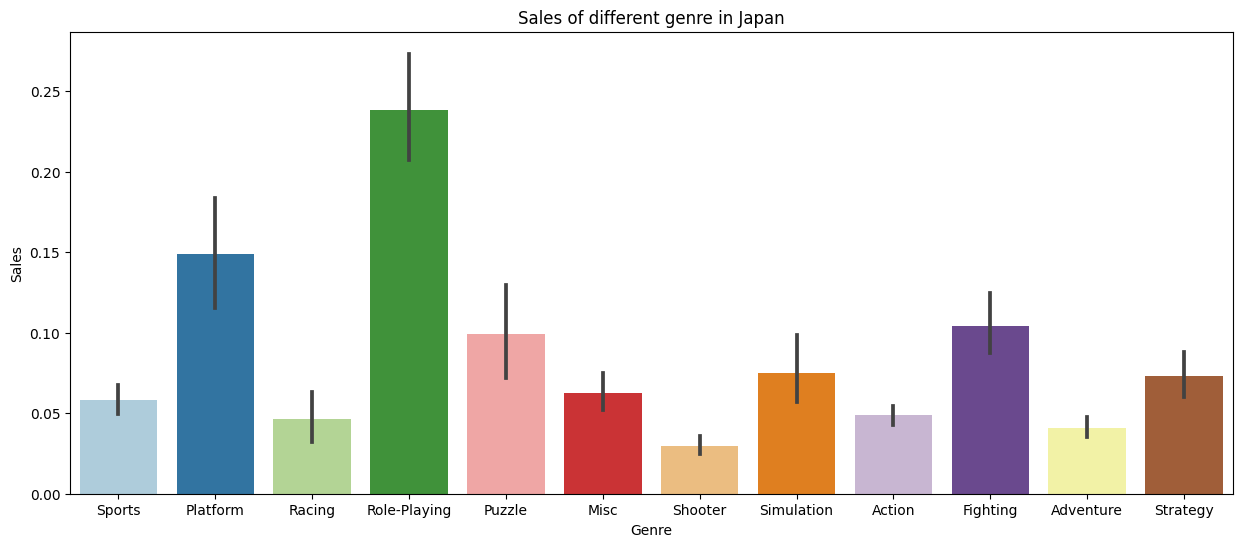

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='JP_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in Japan')

Role Playing games have highest sales in Japan .

Text(0.5, 1.0, 'Sales of different genre in other Regions')

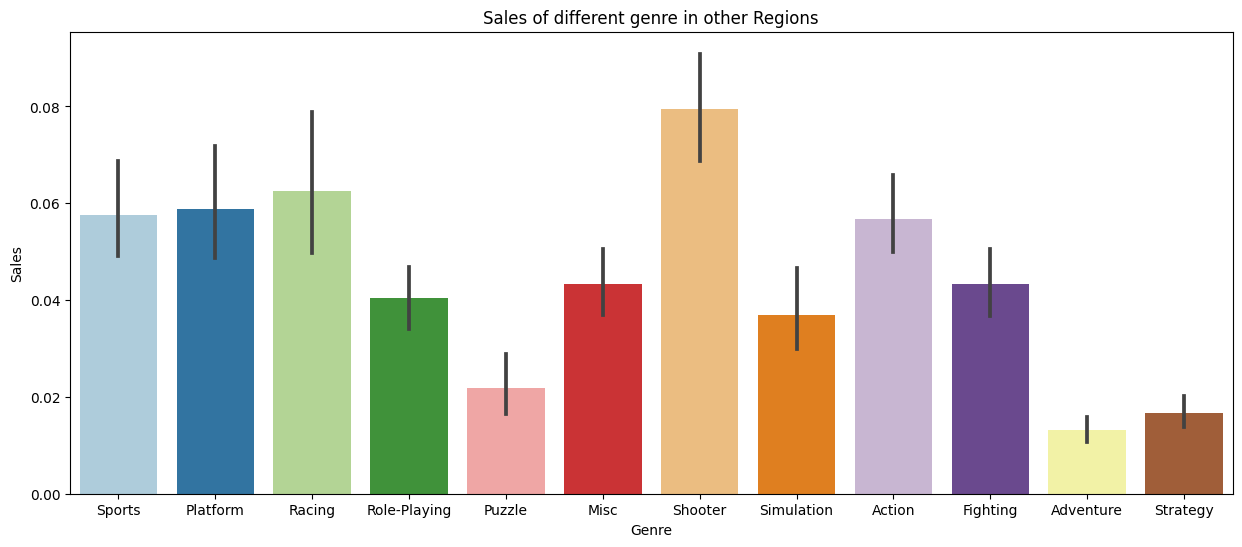

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='Other_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre in other Regions')

Shooter games have highest sales in other regions

Text(0.5, 1.0, 'Frequency of different Genre')

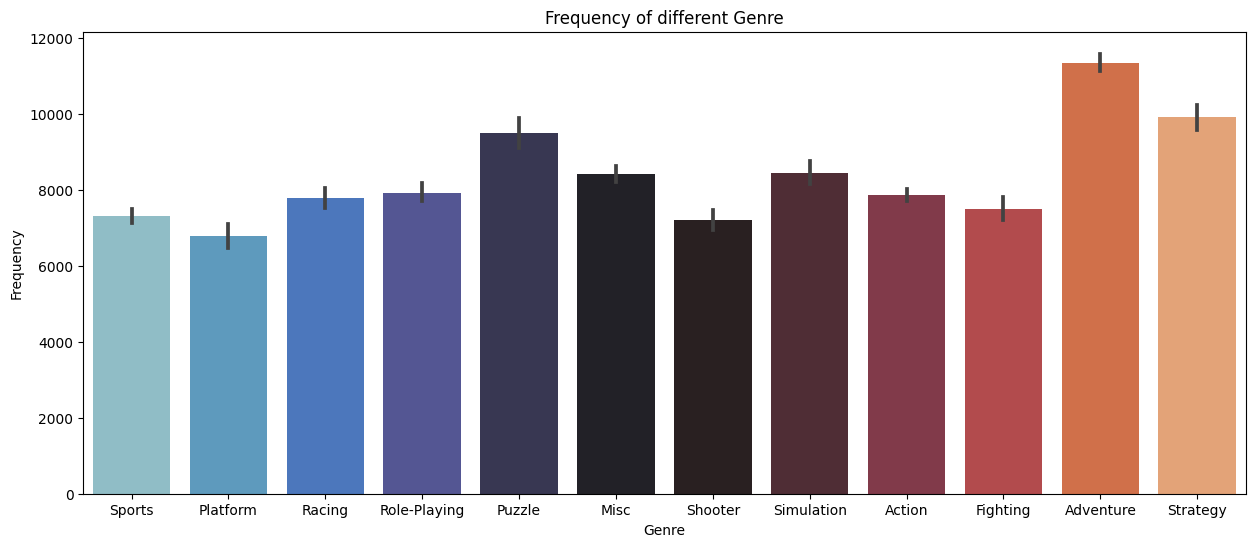

In [ ]:
#freq of different genre
a=np.arange(1,16328)
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y=a,data=df,palette='icefire')
plt.ylabel('Frequency')
plt.title('Frequency of different Genre')

Text(0.5, 1.0, 'Sales of different genre Globally')

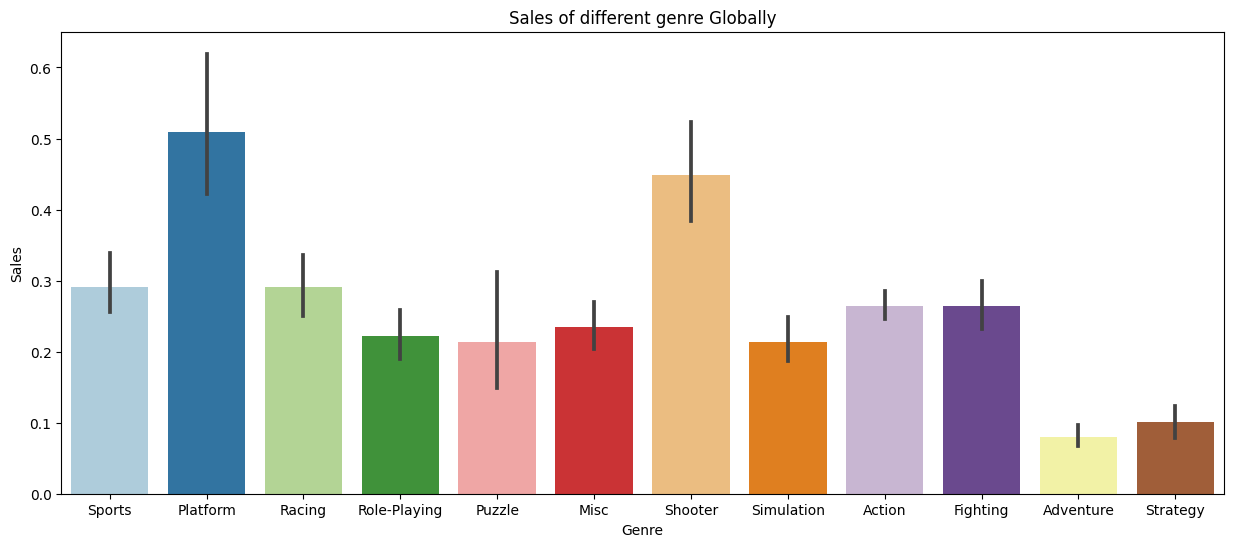

In [ ]:
ax=plt.figure(figsize=(15,6))
sns.barplot(x='Genre',y='NA_Sales',data=df,palette='Paired')
plt.ylabel('Sales')
plt.title('Sales of different genre Globally')

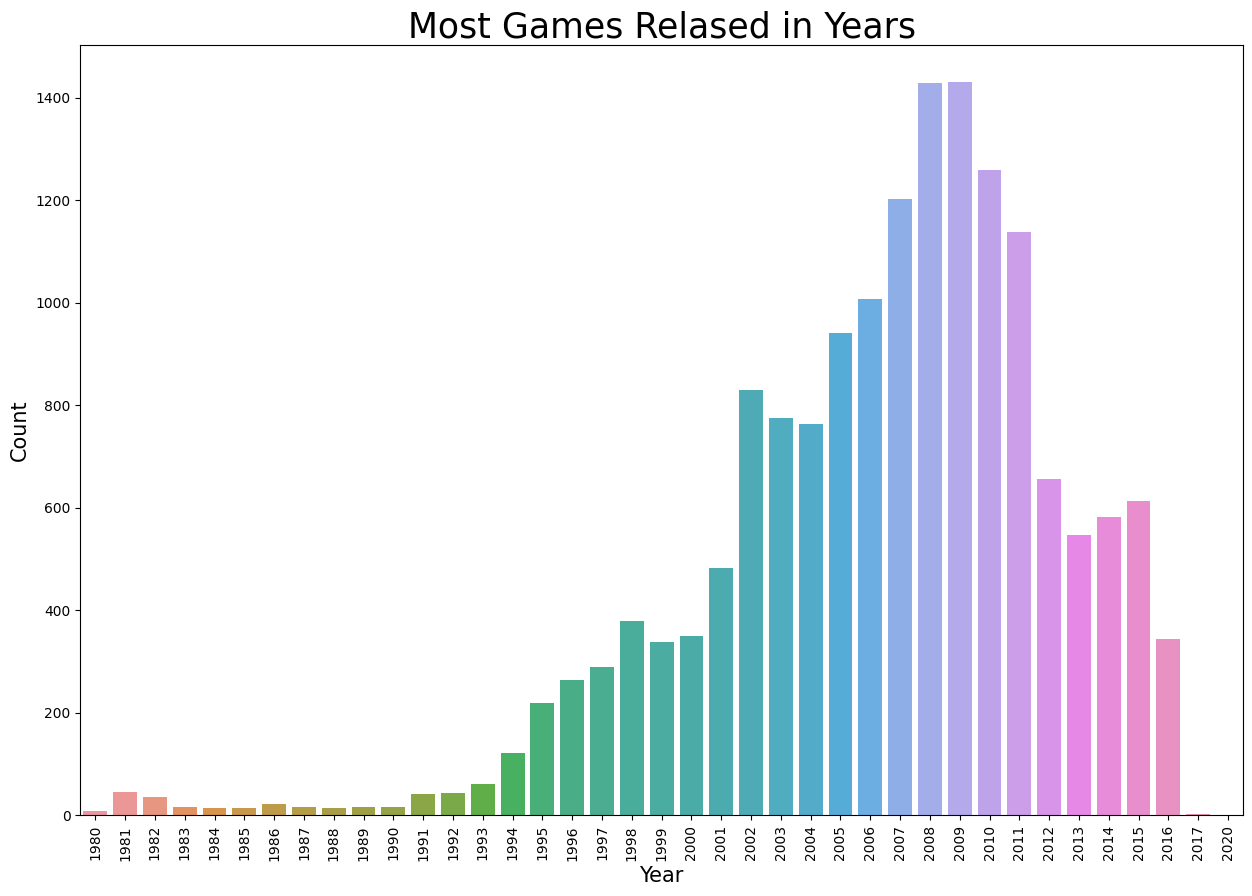

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year",data=df, order = df.groupby(by=['Year'])['Name'].count().index)
plt.xticks(rotation='vertical')
plt.title('Most Games Relased in Years',fontsize=25)
plt.ylabel('Count',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.show()

In [ ]:
data = df.groupby(by=['Year'])['Global_Sales'].sum()     #Note data grouping by year and global_sales to aggregate data efficiently.
data = data.reset_index()

Now finding corr between variables..

# ML Models

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Encoding categorical data

In [ ]:
le = LabelEncoder()
data = df.copy()
#data.Platform = le.fit_transform(df.Platform)
#data.Genre = le.fit_transform(df.Genre)
data.Publisher = le.fit_transform(df.Publisher)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,359,11.27,8.89,10.22,1.00,31.37


One Hot Encoding

In [ ]:
X = data.iloc[: , 2:-1].values

y = data.iloc[: , -1].values

In [ ]:
print(y[0])

82.74


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output=False),[0])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(X[0])

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2006 'Sports' 359
 41.49 29.02 3.77 8.46]


In [ ]:
ct= ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[32])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[0])

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2006 359 41.49 29.02 3.77 8.46]


In [ ]:
print(y[0])

82.74


Splitting into training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=20)


In [ ]:
print(X_train[0])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2010 230 0.0 0.0 0.02 0.0]


In [ ]:
print(y_train[0])

0.02


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13061, 49), (13061,), (3266, 49), (3266,))

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[: , 43:] = sc.fit_transform(X_train[: , 43:])
X_test[: , 43:] = sc.transform(X_test[: , 43:])

In [ ]:
print(X_train[0])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.6196469694320365 -0.3521829008007471
 -0.3083512096725111 -0.2784829750406003 -0.18720894991966924
 -0.25299588333695877]


In [ ]:
print(X_test[0])

[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.4486046576254547 1.1024984340114496
 -0.274027574710045 -0.2035715895901927 -0.2500416903770991
 -0.25299588333695877]


# Linear Regression

Training the multiple linear regression model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting test results

In [ ]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision = 5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1)), 1))
y_pred.shape

(3266,)

In [ ]:
pd.concat([pd.DataFrame(y_pred), pd.DataFrame(y_test)])

,0
0,0.070263
1,0.610481
2,0.909967
3,0.580738
4,0.220583
...,...
3261,0.190000
3262,0.280000
3263,0.650000
3264,0.160000


In [ ]:
print(y_pred[0])

0.07026290893554688


**Summary of model**

Parameters

In [ ]:
c = regressor.intercept_
m = regressor.coef_
print("Intercept is: ", c)
print("Coefficient are: ", m)

Intercept is:  10761573782.601652
Coefficient are:  [-1.07615738e+10 -1.07615738e+10 -1.07615738e+10 -1.07615738e+10
 -1.07615738e+10 -1.07615738e+10 -1.07615738e+10 -1.07615738e+10
 -1.07615738e+10 -1.07615738e+10 -1.07615738e+10 -1.07615738e+10
  5.07177095e-05 -5.47316407e-04  4.98360041e-05  1.45563960e-04
  2.60957430e-04 -1.89796125e-04  5.32356828e-04  4.22227941e-04
 -1.08032364e-04  1.49011612e-08  3.52345162e-04  6.37645502e-05
  1.00734992e-04  5.25725606e-04 -1.91445505e-04 -2.94923007e-04
 -1.79674284e-04 -5.18743210e-05 -3.59422807e-04 -2.08837660e-04
 -1.74790269e-04 -2.25130267e-04 -2.35727669e-04 -2.48079727e-04
 -3.62132216e-04 -2.65304960e-04  3.38245049e-04  2.15959654e-04
  1.70436218e-04  4.18464929e-04 -1.34659383e-04 -5.98816881e-05
 -1.05497280e-04  8.73939904e-01  5.34012712e-01  3.18293076e-01
  1.92546226e-01]


In [ ]:
r2_score(y_test , y_pred)

0.9999787025081468